# Машинное обучение, DS-поток
## Задание ML.2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;
* Задача 5 &mdash; 150 баллов.

----

In [1]:
# Bot check

# HW_ID: ds_ml2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

sns.set(palette='Set2')

---
### Задача 1.

Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет следующий вид: $$\sum\limits_{i=1}^n w_i(y_i - x_i^T\theta)^2 \rightarrow \min\limits_{\theta \in \mathbb{R}}$$

Найдите решение задачи в матричном виде.

Положим $X \in \mathbb R^{n \times d}$ - матрица признаков, $Y \in \mathbb R^n$ - таргеты, $\theta \in \mathbb R^d$ - параметры, $W = \text{diag} (w_1, w_2 \ldots w_n)$ - матрица весов.

Тогда задача примет матричный вид (суммирование по повторяющимся индексам):

$$f(\theta) = W_{ii}(y_i - X_{ij} \theta_j)^2 = (Y - X \theta)^T W (Y - X \theta) = (Y^T - \theta^T X^T) W (Y - X \theta) = $$
$$ = Y^T W Y + \theta^T X^T W X \theta - \theta^T X^T W Y - Y^T W X \theta =  Y^T W Y + \theta^T X^T W X \theta - 2X^T W Y \theta  \rightarrow \min\limits_{\theta \in \mathbb{R}}$$

Найдем минимум функции:

$$\nabla f(\theta) = -2 Y^T W X + 2 X^T W X \theta = 0$$

$$\theta = (X^T W X)^{-1} X^T W Y^T $$

---
### Задача 2.

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков 
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

Зададим регуляризацию через минимизацию следующего функционала:

$${F(\theta) = -\log L_{Y}(\theta) + \lambda \|\theta\|_2^2},$$

где ${L_{Y}(\theta)}$ &mdash; функция правдоподобия.

Опишите процесс оптимизации методами GD, SGD и IRLS.

Посчитаем градиент $F$:

На лекции был выведен градиент $\log L_Y (theta)$ (суммирование по повторяющися индексам, $i \in \overline{1, n}$):
$$\nabla \log L_Y = \nabla \left( y_i \log (\sigma(x_i^T \theta)) + (1-y_i) \log (1 - \sigma(x_i^T \theta)) \right) = X^T(Y - \sigma(X\theta))$$
Градиент регуляризационной части:
$$d(\lambda \langle \theta, \theta \rangle) =  \langle 2 \lambda \theta, d\theta \rangle \Rightarrow \nabla \|\theta\|_2^2  = 2 \lambda \theta $$
(где $\sigma$ берется *покомпонентно*), тогда:
$$\nabla F(\theta) = X^T(\sigma(X\theta) - Y) + 2 \lambda \theta$$

**GD:**

$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{n} \left( X^T(\sigma(X\theta) - Y) + 2 \lambda \theta_{old} \right)$$

**SGD** с батчем размера $k$: случайно выбираются индексы $I = (i_1, i_2, \ldots i_k)$, причем $i_j \sim U(1, 2, \ldots n)$ - равномерно распределены:

$$
\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{k} \left(\sum\limits_{i \in I}x_i^T(\sigma(x_i^T\theta) - Y_i) + 2 \lambda \theta_{old} \right)
$$

($I$ на каждой итерации выбирается отдельно)

**IRLS:**

На лекции аналогично был выведен гессиан $\log L_Y (\theta)$:

$$H(\theta) = - X^T W X$$
где $W = \text{diag}(\sigma(x_i^T \theta)(1 - \sigma(x_i^T \theta)), i \in \overline{1, n}$

Осталось посчитать гессиан регуляризационной части:

$$d\langle 2 \lambda \theta, d\theta_1 \rangle  = \langle 2\lambda d\theta, d\theta_1 \rangle = \langle 2 \lambda I d\theta_1, d \theta \rangle \rightarrow H_{\|\theta\|_2^2} = 2\lambda I$$

Откуда получаем гессиан минимизируемой функции:

$$H(\theta) = X^T W X + 2 \lambda I$$

метод Ньютона дает:
$$\theta_{new} = \theta_{old} - (\nabla^2 F(\theta_{old}))^{-1} (\nabla F(\theta_{old}))$$
$$\theta_{new} = \theta_{old} - (X^T W X + 2 \lambda I)^{-1}(X^T(\sigma(X\theta) - Y) + 2 \lambda \theta_{old})$$

---
### Задача 3.

Исследуем логистическую регрессию на простых примерах. С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

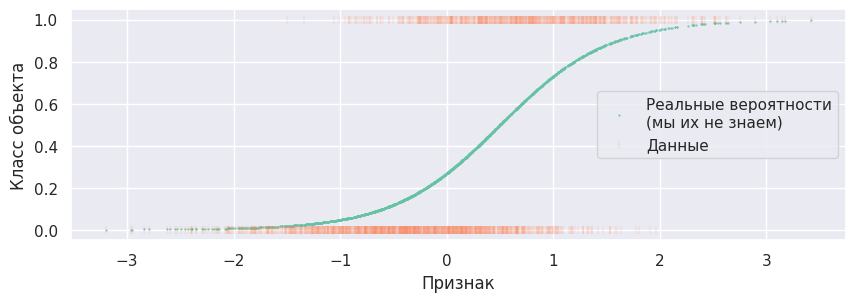

In [3]:
sample_size = 2000

# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2*X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности\n(мы их не знаем)')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.legend();

Обучите логистическую регрессию, используя реализацию из sklearn, при этом
* свободный коэффициент должен присутствовать в модели,
* регуляризацию использовать не нужно.

Разделим на обучающую и тестовую выборки:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 1), (300, 1), (1700,), (300,))

Обучим модель:

In [5]:
clf = LogisticRegression(fit_intercept=True, penalty=None)
clf.fit(X_train, y_train)

LogisticRegression(penalty=None)

Напечатайте оценку коэффициентов

In [6]:
clf.coef_, clf.intercept_

(array([[1.97519541]]), array([-0.8838381]))

Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

Функция построения:

In [7]:
def plot_proba_grid(X, Y, Y_true, model, scaler=None):
    '''
    Построение графика предсказаний классов и вероятностей класса 1
    
    :param X: данные X всего датасета 
    :param Y: данные Y всего датасета 
    :param Y_true: истинные y
    :param model: обученная модель на тренировочной выборке 
    :param scaler: скейлер для модели
    '''
    X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))

    if scaler:
        X_grid = scaler.transform(X_grid)

    y_pred_proba = model.predict_proba(X_grid)[:, 1]
    y_pred_class = model.predict(X_grid)

    plt.figure(figsize=(10, 4))
    plt.scatter(X, Y, marker='|', alpha=0.1, label='Все данные')
    plt.plot(X_grid, y_pred_proba, color='red', label='Предсказанные вероятности класса 1')
    plt.scatter(X, Y_true, marker='.', s=1, label='Реальные вероятности', color='blue')
    plt.plot(X_grid, y_pred_class, color='green', linestyle='--', label='Предсказанные классы (граница)')
    plt.xlabel('Признак')
    plt.ylabel('Вероятность класса 1')
    plt.legend();
    plt.show()

Сам график:

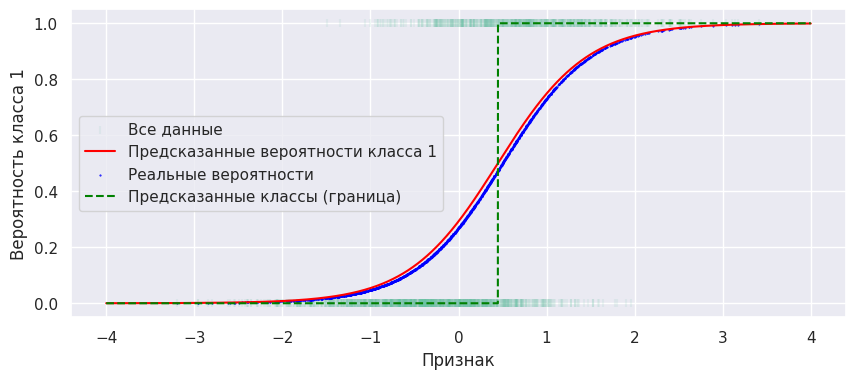

In [8]:
plot_proba_grid(X=X, Y=y, Y_true=y_mean_true, model=clf)

**Вывод:**

Получается, что модель довольно хорошо обучается, предсказанные вероятности почти сходятся с реальными

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины порядка 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`.

In [9]:
def plot_bin_proba(X, Y, model, scaler=None):
    '''
    Построение графика доли объектов класса 1 по бинам
    и предсказанных вероятностей
    
    :param X: данные X всего датасета 
    :param Y: данные Y всего датасета 
    :param model: обученная модель на тренировочной выборке
    :param scaler: скейлер для модели
    '''
    X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))

    if scaler:
        X_grid = scaler.transform(X_grid)
        
    y_pred_proba = model.predict_proba(X_grid)[:, 1]
    y_pred_class = model.predict(X_grid)
    bin_edges = np.arange(-4, 4.1, 0.2)
    bin_middles = np.arange(-4.1, 4.1, 0.2)
    bins = np.digitize(X[:, 0], bin_edges)

    df = pd.DataFrame({'X': X[:, 0], 'y': y, 'bin': bins})

    bin_ratio = df.groupby('bin')['y'].sum() / df.groupby('bin')['y'].count()

    # В некоторые бины совсем не попадают X
    full_bin_ratio = pd.Series(index=np.arange(1, len(bin_edges) + 1), data=0)
    full_bin_ratio.update(bin_ratio)

    plt.figure(figsize=(10, 5))
    plt.plot(X_grid, y_pred_proba, color='red', label='Предсказанные вероятности (класс 1)')
    plt.errorbar(bin_middles, full_bin_ratio, xerr=0.1, fmt='o', color='black',
                 label='Доля объектов класса 1 в бинах', zorder=3,
                 elinewidth=0.9)
    plt.xlabel('Признак')
    plt.ylabel('Вероятность класса 1 / доля объектов')
    plt.legend();
    plt.show()
    

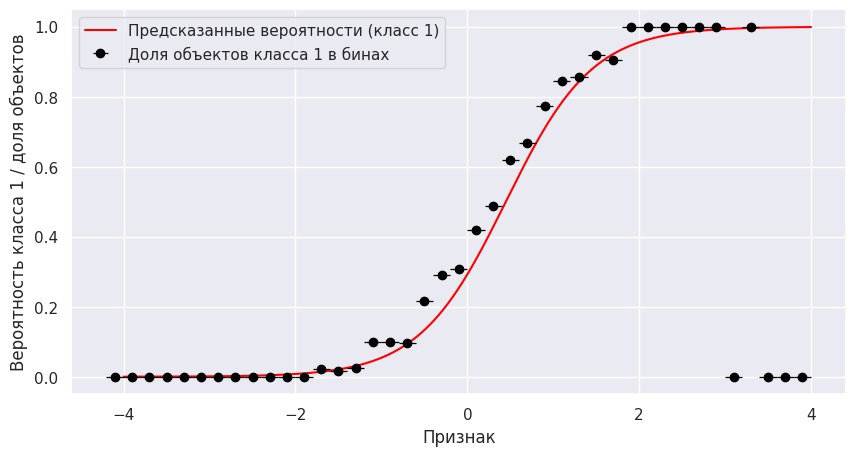

In [10]:
plot_bin_proba(X = X, Y = y, model=clf)

**Вывод:**

Мы видим, что точки долей объектов довольно точно ложатся на кривую вероятностей, модель хорошо предсказывает вероятности.

Повторите проведенное исследование для следующих данных и сравните результаты.

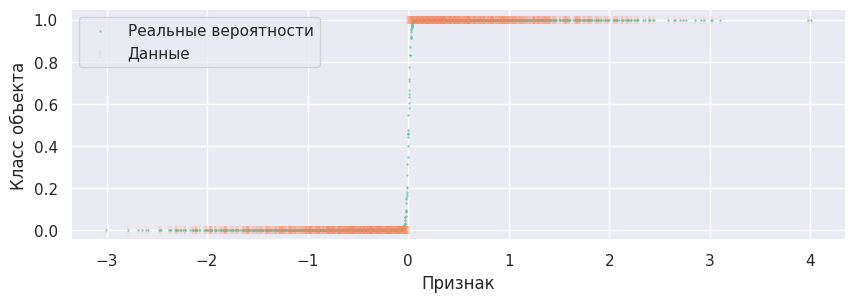

In [11]:
# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100*X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.legend();

Как и ранее, разделим выборки, обучим модель и напечатаем коэффициенты

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

clf = LogisticRegression(fit_intercept=True, penalty=None)
clf.fit(X_train, y_train)

clf.coef_, clf.intercept_

(array([[90.30524914]]), array([-0.03866757]))

Первый график:

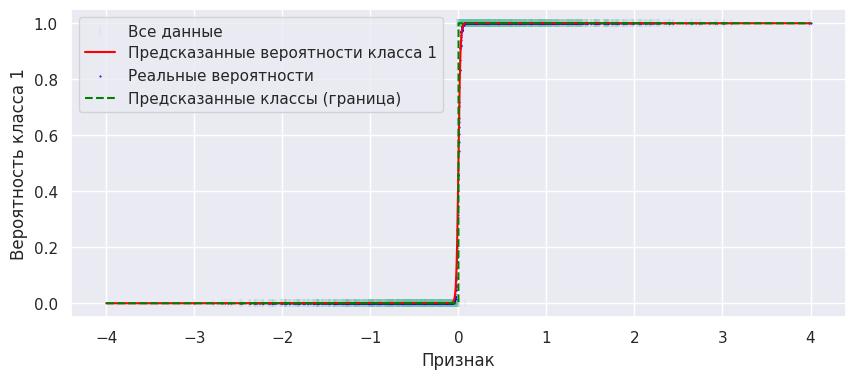

In [13]:
plot_proba_grid(X=X, Y=y, Y_true=y_mean_true, model=clf)

Второй график:

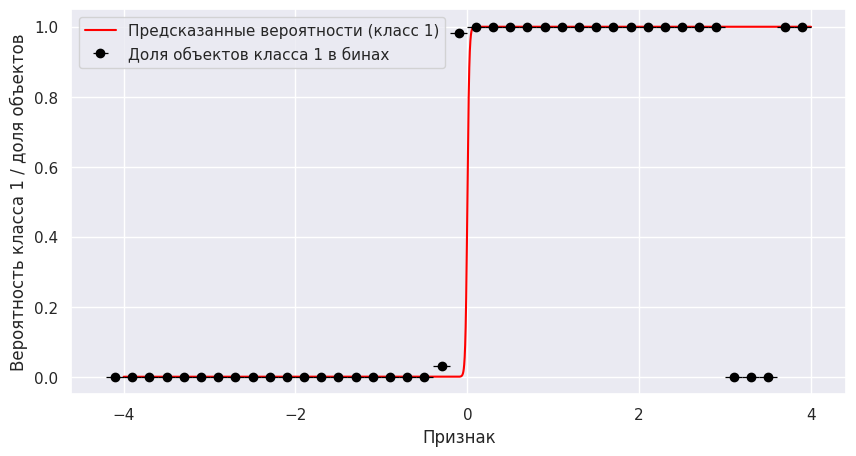

In [14]:
plot_bin_proba(X=X, Y=y, model=clf)

**Вывод:**

Здесь аналогично модель хорошо справляется с предсказаниями. Правда, в бины плохо попадает ступенька роста вероятностей из за ее крутого роста.

Исследуйте, как меняются предсказания для второго датасета при наличии регуляризации.

Для регуляризации нам дополнительно нужна стандартизация признаков

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train_scaled, y_train)

clf.coef_, clf.intercept_

(array([[10.36534869]]), array([0.41390535]))

Как видно, параметры уже отличаются от модели без регуляризации, причем сильно

(96.3314752, 0.23515918)

Первый график:

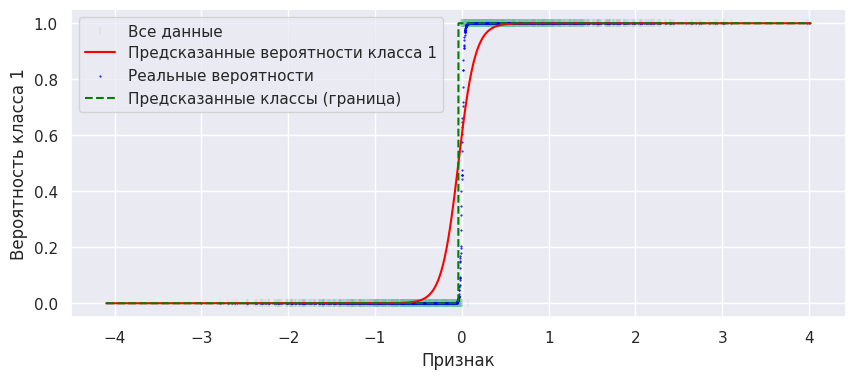

In [16]:
plot_proba_grid(X=X, Y=y, Y_true=y_mean_true, model=clf, scaler=scaler)

Второй график:

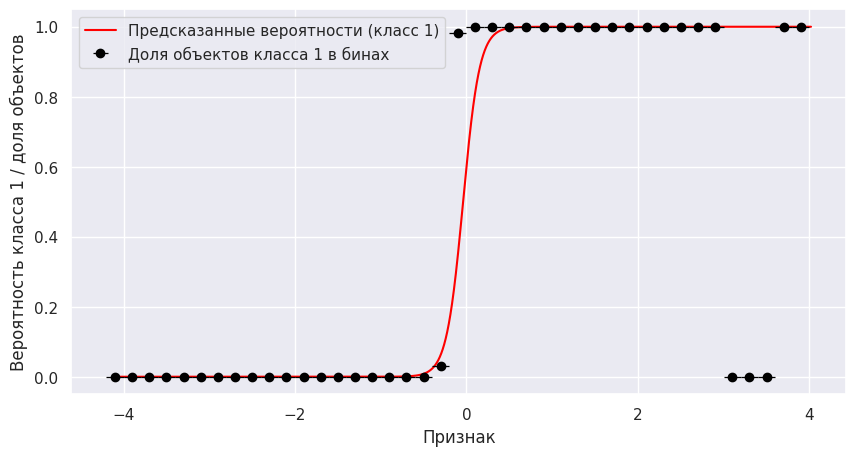

In [17]:
plot_bin_proba(X=X, Y=y, model=clf, scaler=scaler)

**Выводы:**

Регуляризация не позволяет параметрам модели быть слишком большими, поэтому ступенька вероятностей оказывается более сглаженной, а предсказанные вероятности расходятся с реальными.

---
### Задача 4.

Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [18]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype='>i8').view(np.uint8), axis=1)[:, -3:],
    columns=['x1', 'x2', 'y'],
)
data.head()

,x1,x2,y
0,1,1,0
1,0,1,1
2,0,0,1
3,0,0,0
4,1,0,0


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 различных предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pivot_table`.

In [19]:
frequencies = data.pivot_table(index=['x1', 'x2'], values='y', aggfunc='mean')
frequencies

y
x1 x2          
0  0   0.393224
   1   0.681538
1  0   0.224483
   1   0.074818

Обучите логистическую регрессию и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее. 

Обучим модель

In [20]:
X = data[['x1', 'x2']]
y = data['y']

clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)

LogisticRegression()

Сравним результаты

In [21]:
data_values = pd.DataFrame({
    'x1': [0, 0, 1, 1],
    'x2': [0, 1, 0, 1]
})
predicted_probs = clf.predict_proba(data_values)[:, 1]

pd.DataFrame({
    'x1': data_values['x1'],
    'x2': data_values['x2'],
    'predicted_probs': predicted_probs,
    'frequency': frequencies['y'].values
})

,x1,x2,predicted_probs,frequency
0,0,0,0.453455,0.393224
1,0,1,0.604455,0.681538
2,1,0,0.158280,0.224483
3,1,1,0.257252,0.074818


Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

**Ответ:**

Модель никак не использует тот факт, что возможных значений признаков всего 8, и делает предсказания для признаков в пространстве $\mathbb R^2$, так что у нее можно спросить про предсказания, например, на паре (0.5, 0.5).

Таким образом, модель предсказывает линейную зависимость признаков и таргета (как и всякий линейный классификатор), но такой зависимости в действительности в данном случае нет.

Предложите и реализуйте способ обучить логистическую регрессию чтобы она точнее предсказывала частоты, посчитанные ранее.

Надо добавить какой то нелинейный признак, чтобы расширить пространство признаков. Добавление 1 признака увеличивает размерность в 2 раза, и точек становится сильно больше.

In [22]:
data['x3'] = (data['x1'] + data['x2']) ** 2

X = data[['x1', 'x2', 'x3']]

Обучим модель:

In [23]:
clf = LogisticRegression(fit_intercept=True, penalty=None)
clf.fit(X, y)

LogisticRegression(penalty=None)

Сравним результаты

In [24]:
data_values = pd.DataFrame({
    'x1': [0, 0, 1, 1],
    'x2': [0, 1, 0, 1],
    'x3': (np.array([0, 0, 1, 1]) + np.array([0, 1, 0, 1])) ** 2,
})
predicted_probs = clf.predict_proba(data_values)[:, 1]

pd.DataFrame({
    'x1': data_values['x1'],
    'x2': data_values['x2'],
    'predicted_probs': predicted_probs,
    'frequency': frequencies['y'].values
})

,x1,x2,predicted_probs,frequency
0,0,0,0.393324,0.393224
1,0,1,0.681207,0.681538
2,1,0,0.224539,0.224483
3,1,1,0.074863,0.074818


Сделайте вывод по этой и предыдущей задачам.

**Вывод:**

Для задач с бинарными признаками и таргетами:

Достаточно добавить пару нелинейных признаков, чтобы увеличить пространство, на котором работает линейная регрессия, и ее точность станет намного выше. В случае данной задачи было достаточно 1 признака.

В общем, линейная регрессия хорошо предсказывает на простых данных, но её точность может снижаться, когда данные содержат более сложные зависимости между признаками.

---
### Задача 5.

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор, даже если регуляризации нет, для исключения вычислительных проблем.
5. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.

Импорт специальных функций и времени

In [25]:
from scipy.special import logsumexp, expit
from numpy import logaddexp
from time import time

Реализация класса:

In [26]:
class LogisticRegression():
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:
    
    :param alpha: параметр регуляризации. 
                     Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае
                   если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае 
                        если используется критерий criterion='max_iter'
    :param method: если равно 'gd', то используется обычный градиентный спуск,
                   если равно 'sgd', то используется стохастический 
                        градиентный спуск,
                   если равно 'irls', то используется метод IRLS.
    :param criterion: если равно 'eps', то используем ограничение 
                        на норму невязки,
                      если равно 'max_iter', то используем ограничение 
                        на количество итераций,
                      если равно 'both', то используются оба ограничения
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    '''
    
    def __init__(
        self,
        alpha=0,
        lr=0.5,
        eps=1e-3,
        max_iter=1e5,
        method='gd',
        criterion='max_iter',
        fit_intercept=True,
        save_history=True,
    ):
        '''Создает модель и инициализирует параметры.'''
        
        criterion_error_msg = 'выбран неправильный критерий остановки'
        assert criterion in ['max_iter', 'eps', 'both'], criterion_error_msg
        
        method_error_msg = 'выбран неправильный метод'
        assert method in ['gd', 'sgd', 'irls'], method_error_msg

        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = max_iter
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history_time = []  # для хранения истории обучения
        self.history_log = []

    @staticmethod
    def _sigmoid(x):
        return expit(x)
        
    def _log_likelihood(self, X, y):
        '''
        Возвращает логарифм функции правдоподобия
        '''
        
        pre_predict = X @ self.coef_
        
        log_likelihood = np.sum(y * (-np.logaddexp(0, -pre_predict)) 
                                + (1 - y) * (-np.logaddexp(0, pre_predict)))
    
        return log_likelihood

    
    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.
        
        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''
        
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X

        return X_copy

    def _after_iteration(self, param_difference, X, Y):
        '''
        Обновляет историю, возвращает, нужна ли остановка
        '''
        time_diff = time() - self.last_time
        if self.save_history:
            self.history_time.append(time_diff)  # для хранения истории обучения
            self.history_log.append(self._log_likelihood(X, Y))
        last_time = time()
        return self._stop_criterion_check(param_difference)
        
    def _stop_criterion_check(self, param_difference):
        '''
        Проверяет, нужно ли остановиться обучению модели
        
        :param param_difference: разница параметра на очередном шаге обучения
        '''
        
        if self.criterion in ['max_iter', 'both'] and self.n_iter_ >= self.max_iter:
            return True
        if self.criterion in ['eps', 'both'] and np.linalg.norm(param_difference) < self.eps:
            return True
        return False
    
    def fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью выбранного метода,
        пока не выполнится критерий остновки self.criterion.
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        
        :param X: матрица признаков nxd
        :param Y: истинные метки n
        '''
        
        assert X.shape[0] == Y.shape[0]

        if self.fit_intercept:  # добавляем свободный коэфициент
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        self.history = []
        n_shape = X_copy.shape[0]
        d_shape = X_copy.shape[1]
        
        self.coef_ = np.zeros(d_shape)
        self.n_iter_ = 0
        # Для IRLS при вырожденном гессиане
        regularizated_matrix = 0.01 * np.eye(d_shape)
        self.last_time = time()
        self.stop = False
        while True:
            # Градиентный спуск (одна итерация)
            if self.method == 'gd':
                predict = self._sigmoid(X_copy @ self.coef_)
                gradient = X_copy.T @ (predict - Y) + 2 * self.alpha * self.coef_
                difference = self.lr * gradient / n_shape
                self.coef_ -= difference
                self.n_iter_ += 1
                if (self._after_iteration(difference, X_copy, Y)):
                    break
    
            # Стохастический градиентный спуск (одна эпоха)
            elif self.method == 'sgd':
                indices = np.random.permutation(n_shape)
                batch_size = n_shape // 10 + 5
                # Одна итерация
                for start in range(0, n_shape, batch_size):
                    end = min(start + batch_size, X_copy.shape[0])
                    batch_indices = indices[start : end]
                    X_new = X_copy[batch_indices]
                    Y_new = Y[batch_indices]
                    predict = self._sigmoid(X_new @ self.coef_)
                    gradient = X_new.T @ (predict - Y_new) + 2 * self.alpha * self.coef_
                    difference = self.lr * gradient / batch_size
                    self.coef_ -= difference
                    self.n_iter_ += 1
                    if (self._after_iteration(difference, X_copy, Y)):
                        self.stop = True
                        break
                if self.stop:
                    break

            # IRLS
            elif self.method == 'irls':
                predict = self._sigmoid(X_copy @ self.coef_)
                W = np.diag(predict * (1 - predict))
                H = X_copy.T @ W @ X_copy + 2 * self.alpha * np.eye(d_shape)
                # H может оказаться вырожденноы
                H += regularizated_matrix
                H_inv = np.linalg.inv(H)
                gradient = X_copy.T @ (predict - Y) + 2 * self.alpha * self.coef_
                difference = H_inv @ gradient
                self.coef_ -= difference
                self.n_iter_ += 1
                if (self._after_iteration(difference, X_copy, Y)):
                    break
        
        return self

        
    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).
        
        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.coef_.shape[0]

        return (self._sigmoid(X_copy @ self.coef_) >= 0.5).astype(int)

        
    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.
        
        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.coef_.shape[0]

        prob = self._sigmoid(X_copy @ self.coef_)
        
        return np.column_stack([1 - prob, prob])

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [27]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

[':Attribute Information:',
 '    - radius (mean of distances from center to points on the perimeter)',
 '    - texture (standard deviation of gray-scale values)',
 '    - perimeter',
 '    - area',
 '    - smoothness (local variation in radius lengths)',
 '    - compactness (perimeter^2 / area - 1.0)',
 '    - concavity (severity of concave portions of the contour)',
 '    - concave points (number of concave portions of the contour)',
 '    - symmetry',
 '    - fractal dimension ("coastline approximation" - 1)',
 '',
 '    The mean, standard error, and "worst" or largest (mean of the three',
 '    worst/largest values) of these features were computed for each image,',
 '    resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '    10 is Radius SE, field 20 is Worst Radius.',
 '',
 '    - class:',
 '            - WDBC-Malignant',
 '            - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [28]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм функции правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

Обучение:

In [30]:
# Параметры обучения
methods = ['gd', 'sgd', 'irls']
alpha = 0
lr = 0.1
eps = 1e-4
max_iter = 3000
history = {}

for method in methods:
    model = LogisticRegression(alpha=alpha, lr=lr, eps=eps, max_iter=max_iter,
                               method=method, save_history=True,
                               criterion='max_iter')
    
    start_time = time()
    model.fit(X_train, Y_train)
    elapsed_time = time() - start_time
    
    history[method] = {'history_log': model.history_log, 'time': model.history_time}

Построение графиков:

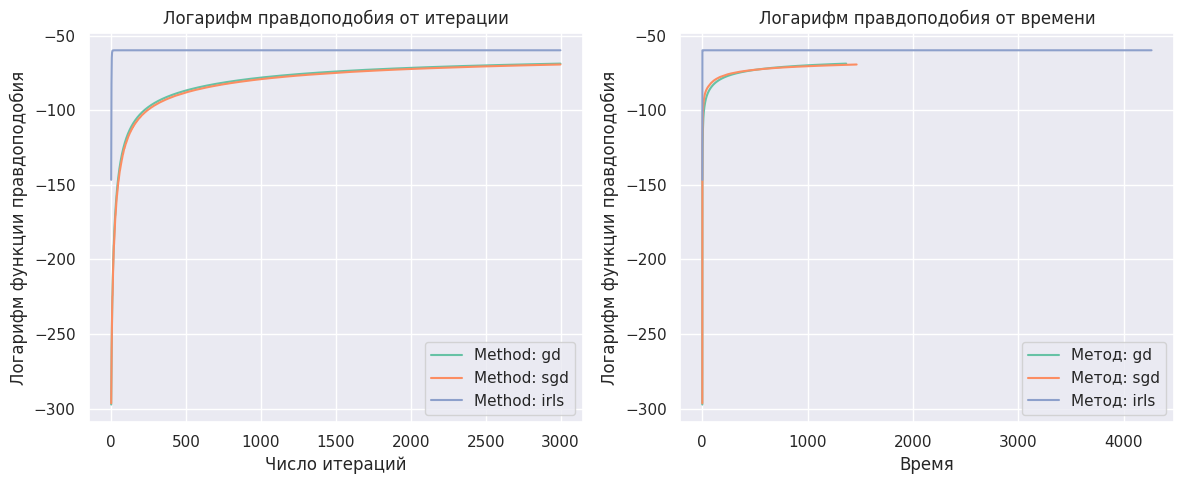

In [31]:
plt.figure(figsize=(12, 5))

# График зависимости функционала от номера итерации
plt.subplot(1, 2, 1)
for method in methods:
    plt.plot(np.arange(len(history[method]['history_log'])), history[method]['history_log'], label=f'Method: {method}')
plt.xlabel('Число итераций')
plt.ylabel('Логарифм функции правдоподобия')
plt.title('Логарифм правдоподобия от итерации')
plt.legend()

# График зависимости функционала от времени итерации
plt.subplot(1, 2, 2)
for method in methods:
    plt.plot(np.cumsum(history[method]['time']), history[method]['history_log'],
             label=f'Метод: {method}')
plt.xlabel('Время')
plt.ylabel('Логарифм функции правдоподобия')
plt.title('Логарифм правдоподобия от времени')
plt.legend()

plt.tight_layout()
plt.show()

**Вывод:**

GD/SGD: сходились примерно одинаково и по времени, и по точности, потому что датасет маленький. Можно использовать размер батча в качестве еще одного гиперпараметра. Эти методы эффективны для больших данных, поскольку не требует инверсии матриц, как IRLS.

IRLS: метод оказался самым быстрым и самым точным для этой задачи на малом датасете. Однако он становится менее применимым для больших данных из-за необходимости вычисления обратной матрицы, и в силу взятия вторых производных, его сложность растет намного быстрее (порядка степенной сложности) с увеличением количества признаков.

**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

In [32]:
lr = 0.01
eps = 1e-4
max_iter = 10000

model_eps = LogisticRegression(alpha=0, lr=lr, eps=eps,
                               max_iter=max_iter, method='gd', save_history=True,
                               criterion='eps')
model_max_iter = LogisticRegression(alpha=0, lr=lr, eps=eps,
                               max_iter=max_iter, method='gd', save_history=True,
                               criterion='max_iter')
model_eps.fit(X_train, Y_train)
model_max_iter.fit(X_train, Y_train)

print(f'Критерий: eps, время: {
    np.sum(model_eps.history_time)
    }, логарифм правдоподобия: {model_eps.history_log[-1]}')
print(f'Критерий: max_iter, время: {
    np.sum(model_max_iter.history_time)
    }, логарифм правдоподобия: {model_max_iter.history_log[-1]}')

Критерий: eps, время: 54593.96321296692, логарифм правдоподобия: -72.42626234231977
Критерий: max_iter, время: 13155.379409790039, логарифм правдоподобия: -78.22866055475596


**Вывод:**

Норма разности векторов весов дает более точные результаты, так как позволяет алгоритму сходиться до тех пор, пока изменение весов не становится маленьким. Это приводит к более точному нахождению минимума, но может занять больше времени.

Ограничение по числу итераций дает менее точные резульатты, так как модель может остановиться до достижения оптимума. Но этот критерий работает быстрее, потому что время работы ограничено числом шагов.

**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

In [33]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10, 100]
history = {}

for lr in lrs:
    model = LogisticRegression(alpha=alpha, lr=lr, eps=eps, max_iter=1000, method='sgd', save_history=True)
    model.fit(X_train, Y_train)
    history[lr] = {'history_log': model.history_log, 'time': model.history_time}
    print(f'Learning rate: {lr}, Логарифм функции правдоподобия: {model.history_log[-1]}')

Learning rate: 1e-05, Логарифм функции правдоподобия: -313.6600502792053
Learning rate: 0.0001, Логарифм функции правдоподобия: -299.5308554402552
Learning rate: 0.001, Логарифм функции правдоподобия: -226.05458745071428
Learning rate: 0.01, Логарифм функции правдоподобия: -122.4523337904964
Learning rate: 0.1, Логарифм функции правдоподобия: -79.25980547423015
Learning rate: 0.2, Логарифм функции правдоподобия: -72.41011824705379
Learning rate: 0.3, Логарифм функции правдоподобия: -69.39670806811738
Learning rate: 0.5, Логарифм функции правдоподобия: -66.5668231595287
Learning rate: 0.7, Логарифм функции правдоподобия: -65.21428278654871
Learning rate: 1, Логарифм функции правдоподобия: -64.17572896123879
Learning rate: 2, Логарифм функции правдоподобия: -62.861617156198164
Learning rate: 5, Логарифм функции правдоподобия: -62.740262132452
Learning rate: 10, Логарифм функции правдоподобия: -65.36625920540945
Learning rate: 100, Логарифм функции правдоподобия: -286.77470626596204


**Выводы:**

Маленькие lr на таком числе шагов не успевают сходиться

Большие lr не сходятся из за того что модель прыгает через оптимальное значение параметры

Оптимальное значение lr в районе 0.5 - 1

Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

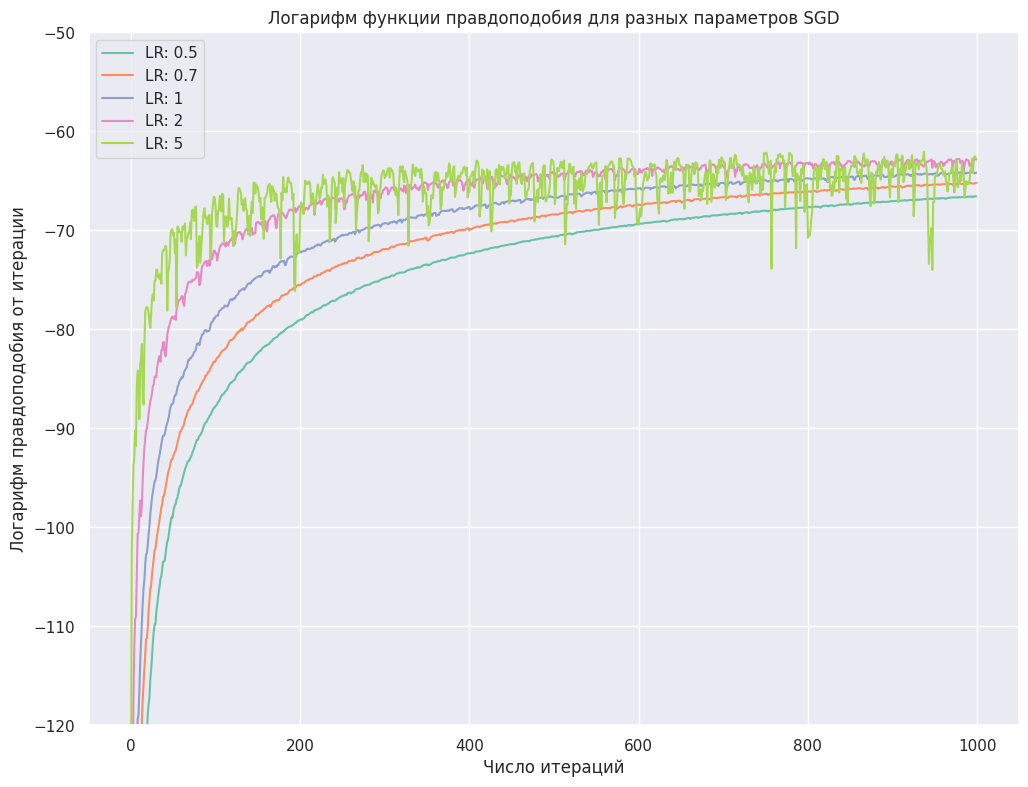

In [34]:
lrs_for_graph = [0.5, 0.7, 1, 2, 5]
plt.figure(figsize=(12, 9))

for lr in lrs_for_graph:
    plt.plot(history[lr]['history_log'], label=f'LR: {lr}')
plt.xlabel('Число итераций')
plt.ylabel('Логарифм правдоподобия от итерации')
plt.ylim(-120, -50)
plt.title('Логарифм функции правдоподобия для разных параметров SGD')
plt.legend()
plt.show()

**Вывод**

Как и ожидалось, при большем lr сходимость быстрее, а при слишком больших lr начинаются колебания логарифма

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

In [35]:
alphas = np.linspace(0, 0.3, 9)

history = {}
methods = ['gd', 'sgd', 'irls']

for method in methods:
    history[method] = {}

print(f"{'Alpha':<10} | {'GD f1_score / time':<30} | {'SGD f1_score / time':<30} | {'IRLS f1_score / time':<30}")
print("-" * 100)

for alpha in alphas:
    row = [f"{alpha:<10.3f}"]
    
    for method in methods:
        model = LogisticRegression(alpha=alpha, lr=0.7, eps=1e-4,
                                   max_iter=5000, method=method,
                                   save_history=True,
                                   criterion='both')
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        time_current = np.sum(model.history_time)
        f1 = f1_score(Y_test, predictions)
        history[method][alpha] = {'history_log': model.history_log, 'time': model.history_time}
        
        row.append(f"{f1:<10.3f} / {time_current:<17.3f}")
    
    print(" | ".join(row))

Alpha      | GD f1_score / time             | SGD f1_score / time            | IRLS f1_score / time          
----------------------------------------------------------------------------------------------------
0.000      | 0.938      / 3839.966          | 0.939      / 146.705           | 0.925      / 13650.842        
0.037      | 0.952      / 4761.586          | 0.947      / 2812.846          | 0.946      / 0.081            
0.075      | 0.946      / 4632.924          | 0.947      / 2652.185          | 0.946      / 0.066            
0.112      | 0.946      / 3129.022          | 0.940      / 2840.300          | 0.946      / 0.071            
0.150      | 0.940      / 2150.268          | 0.940      / 3720.353          | 0.940      / 0.057            
0.188      | 0.940      / 1600.481          | 0.940      / 3528.291          | 0.940      / 0.051            
0.225      | 0.940      / 1180.482          | 0.940      / 3328.786          | 0.940      / 0.045            
0.263      | 0.940 

Регуляризация в таких пределах в улучшило время работы модели IRLS, а SGD (но не SGD), а точность может как улучшиться, так и ухудшиться.

Лучшей моделью оказалась IRLS с alpha = 0.3

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

In [37]:
# Оставляем два признака
X_train_2 = X_train[:, :2]
X_test_2 = X_test[:, :2]

# Обучение модели
model = LogisticRegression(alpha=0, lr=lr, eps=eps, max_iter=max_iter, method='gd', fit_intercept=False)
model.fit(X_train_2, Y_train)

x0_grid, x1_grid = np.meshgrid(np.linspace(X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1, 2001),
                               np.linspace(X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1, 2001))
ravel_grid = np.array([x0_grid, x1_grid]).reshape((2, 2001 * 2001)).T

prob_grid = model.predict_proba(ravel_grid)
prob_grid = prob_grid[:, 0].reshape((2001, 2001))

Построение графика:

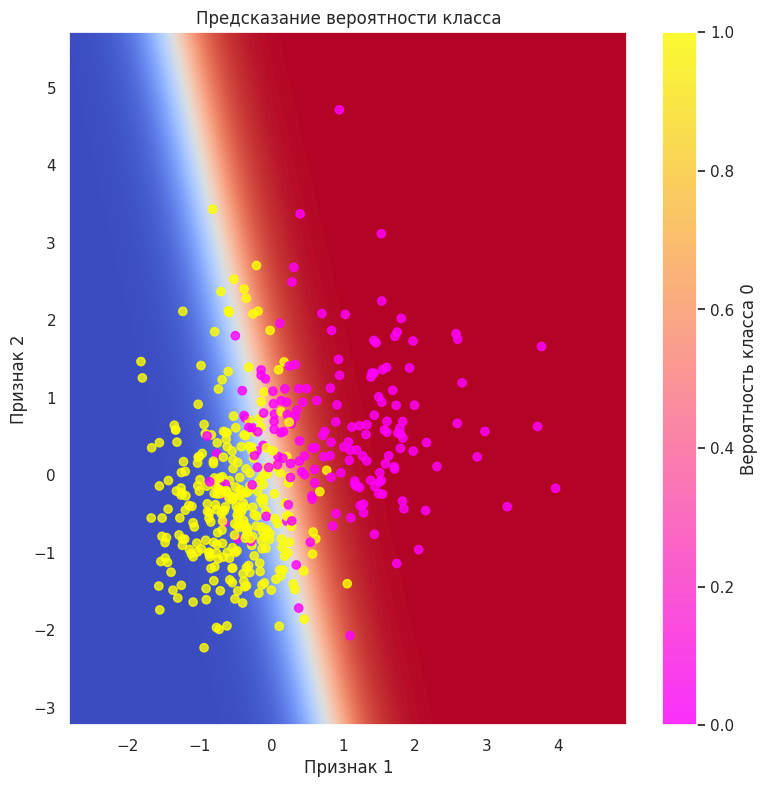

In [38]:
plt.figure(figsize=(9, 9))
plt.pcolormesh(x0_grid, x1_grid, prob_grid, cmap='coolwarm')
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=Y_train, alpha=0.8, cmap='spring')
plt.xlim((X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1))
plt.ylim((X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1))
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Предсказание вероятности класса')
plt.colorbar(label='Вероятность класса 0')
plt.show()

**Вывод:**

На визуализации виден недостаток логистической регрессии. Граница между классами линейная, хотя сами кластеры накладываются друг на друга. Это связанно с нелинейными зависимостями класса от признаков

Модель хорошо работает на линейно разделимых данных, но может иметь ограничения при наличии сложных нелинейных зависимостей.